Found 4800 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Epoch 1/10
150/150 [==============================] - 29s 189ms/step - loss: 0.5152 - accuracy: 0.8244 - val_loss: 1.5218 - val_accuracy: 0.7933
Epoch 2/10
150/150 [==============================] - 28s 184ms/step - loss: 0.0385 - accuracy: 0.9921 - val_loss: 1.5306 - val_accuracy: 0.8042
Epoch 3/10
150/150 [==============================] - 27s 182ms/step - loss: 1.5178e-04 - accuracy: 1.0000 - val_loss: 1.7299 - val_accuracy: 0.8192
Epoch 4/10
150/150 [==============================] - 28s 183ms/step - loss: 3.7966e-05 - accuracy: 1.0000 - val_loss: 1.8118 - val_accuracy: 0.8225
Epoch 5/10
150/150 [==============================] - 28s 183ms/step - loss: 2.2965e-05 - accuracy: 1.0000 - val_loss: 1.8763 - val_accuracy: 0.8225
Epoch 6/10
150/150 [==============================] - 28s 184ms/step - loss: 1.5667e-05 - accuracy: 1.0000 - val_loss: 1.9291 - val_ac

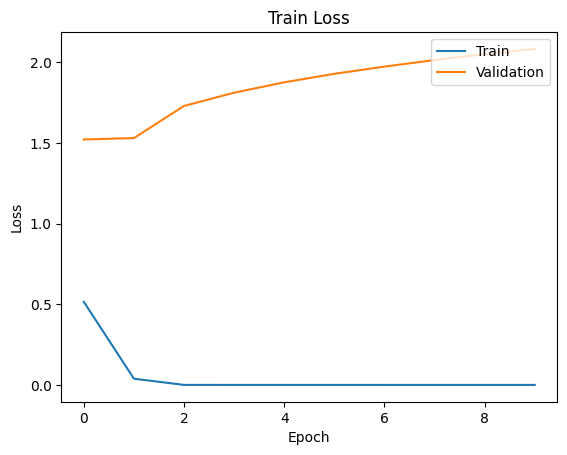

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from keras.regularizers import l2

# Define the data generators
image_datagen = ImageDataGenerator(rescale=1./255, dtype='float32', validation_split=0.2)

train_set = image_datagen.flow_from_directory(
    'Train/',
    target_size = (640, 240),
    batch_size  = 32,
    class_mode='categorical',
    subset='training'
)

validation_set = image_datagen.flow_from_directory(
    'Train/',
    target_size = (640, 240),
    batch_size  = 32,
    class_mode='categorical',
    subset='validation'
)

test_set = image_datagen.flow_from_directory(
    'Test/',
    target_size = (640, 240),
    batch_size  = 32,
    class_mode='categorical'
)

# Build the convnet model
network = models.Sequential()
network.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=((640, 240, 3))))
network.add(layers.MaxPooling2D((2, 2)))
#network.add(layers.Dropout(0.25))
network.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
network.add(layers.MaxPooling2D((2, 2)))
#network.add(layers.Dropout(0.25))
network.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
network.add(layers.MaxPooling2D((2, 2)))
#network.add(layers.Dropout(0.25))
network.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
network.add(layers.MaxPooling2D((2, 2)))
#network.add(layers.Dropout(0.25))
network.add(layers.Flatten())
#network.add(layers.Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
network.add(layers.Dense(32, activation='relu'))
#network.add(layers.Dropout(0.5))
#network.add(layers.Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
network.add(layers.Dense(32, activation='relu'))
#network.add(layers.Dropout(0.5))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

from tensorflow.keras.optimizers import Adam
#optimizer = Adam(learning_rate=0.001)
optimizer = Adam()
network.compile(optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Train the model
history = network.fit(train_set,
                      validation_data=validation_set,
                      epochs=10)

# Evaluate the model on the test set
test_loss, test_acc = network.evaluate(test_set)
print('Accuracy for Testset:', test_acc)

# KC: To plot result figures
import matplotlib.pyplot as plt

# Loss figure
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


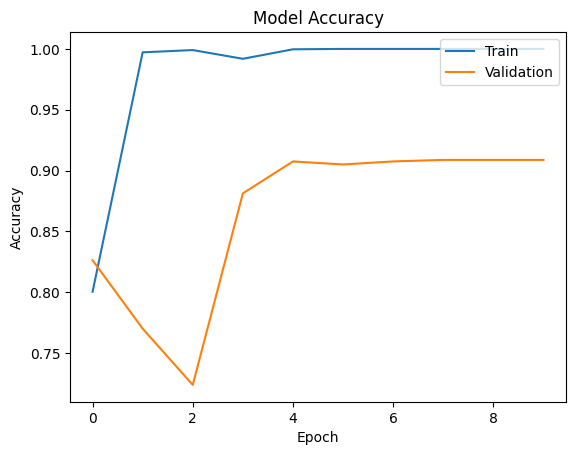

In [17]:

# Accuracy figure
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

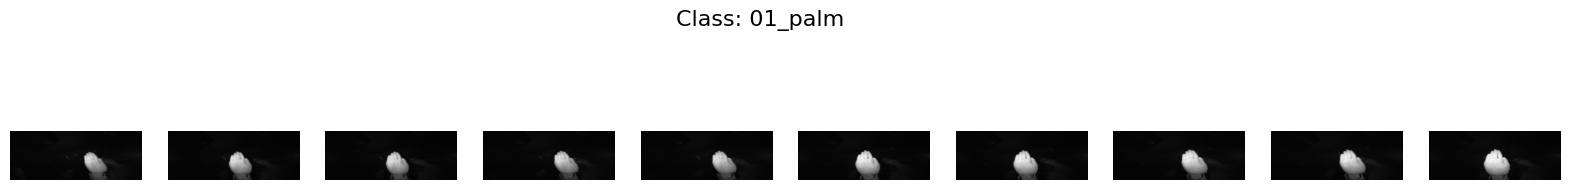

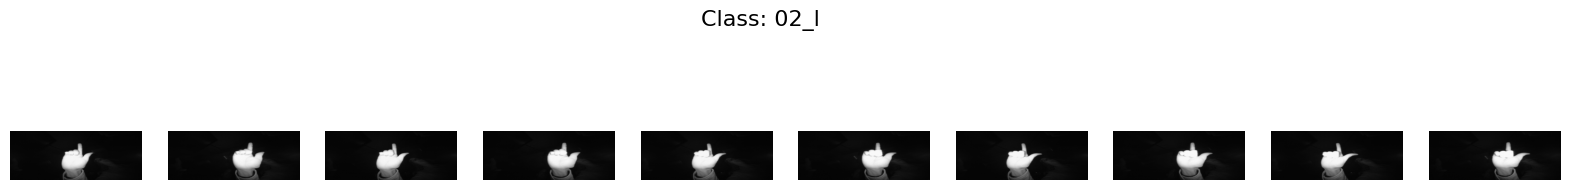

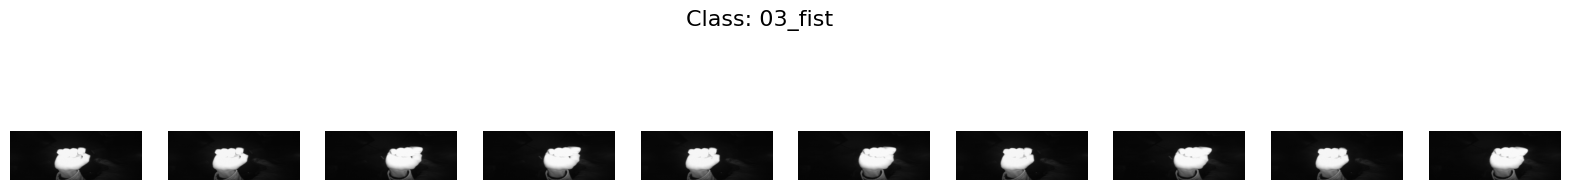

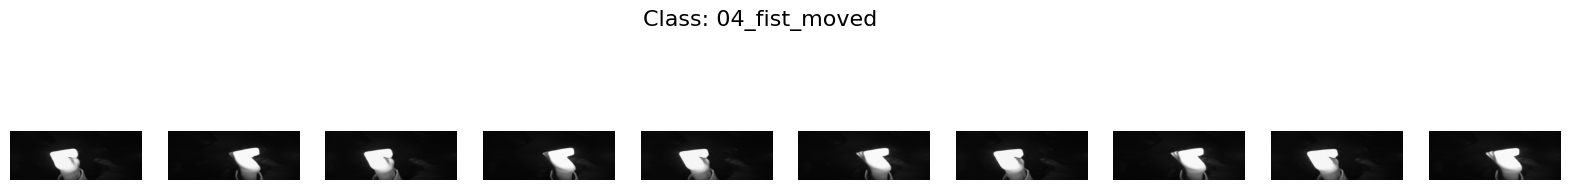

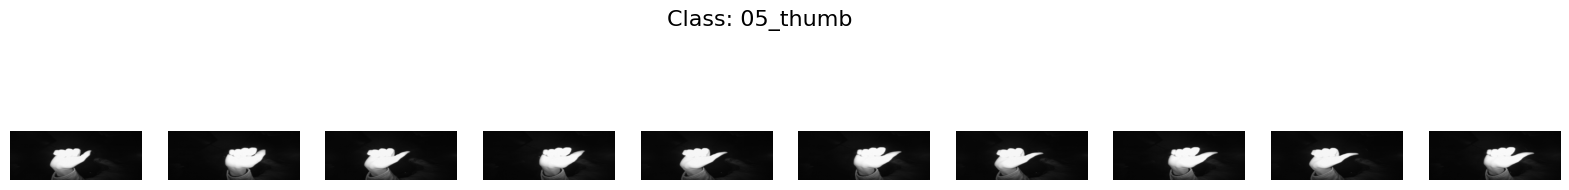

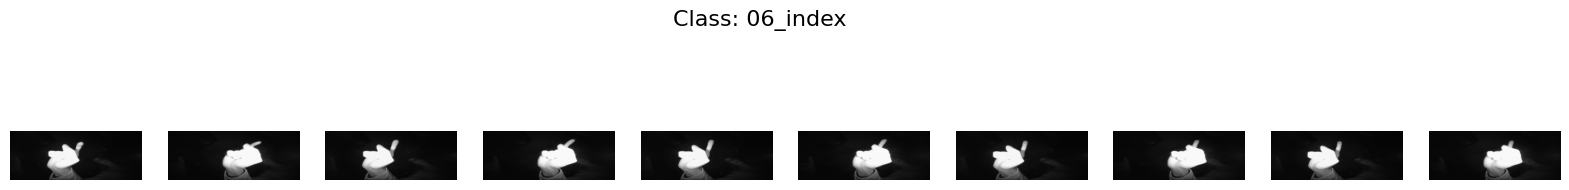

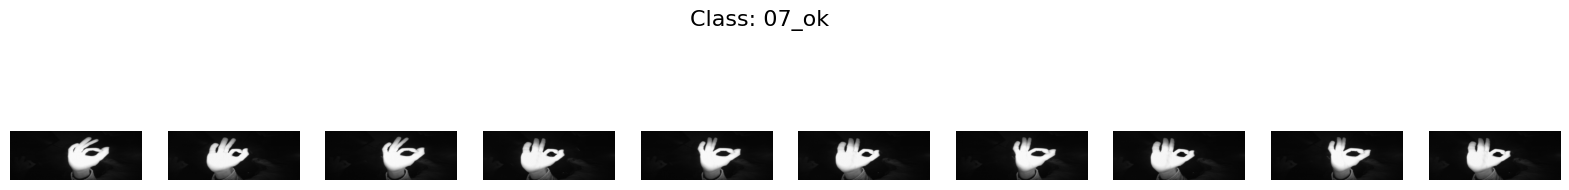

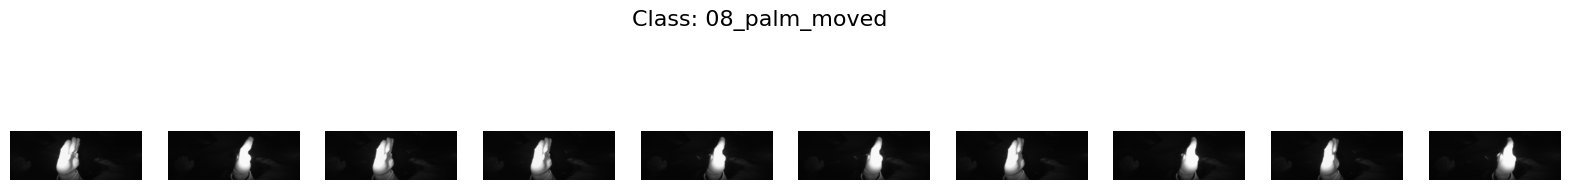

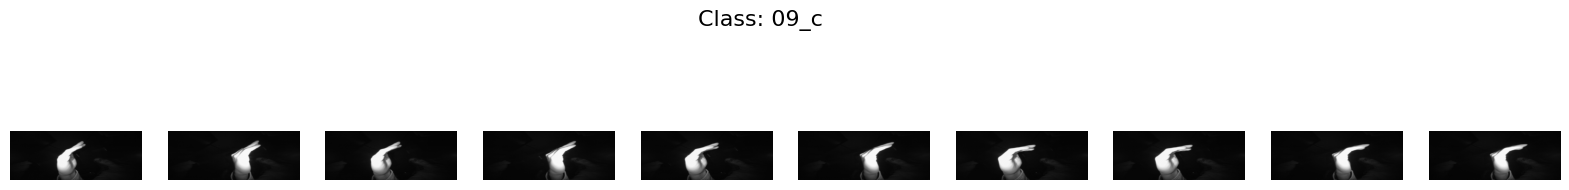

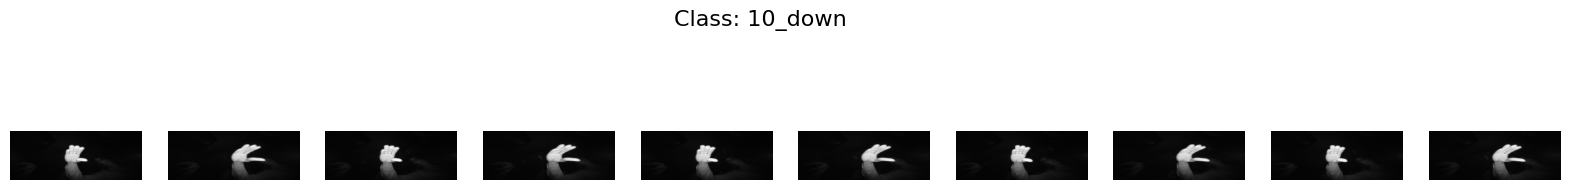

In [18]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Path to the directory containing your dataset
dataset_dir = 'Train/'

# List the subdirectories in the dataset directory (each subdirectory represents a class)
class_names = os.listdir(dataset_dir)

# Number of images to display from each class
num_images_per_class = 10

# Iterate over each class
for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)
    image_files = os.listdir(class_dir)
    
    # Display images from the class
    fig, axes = plt.subplots(1, num_images_per_class, figsize=(20, 3))
    fig.suptitle(f'Class: {class_name}', fontsize=16)
    
    for i in range(10):
        image_path = os.path.join(class_dir, image_files[i])
        image = load_img(image_path)
        axes[i].imshow(image)
        axes[i].axis('off')
    
    plt.show()


Found 2000 images belonging to 10 classes.
2000/2000 [==============================] - 9s 4ms/step


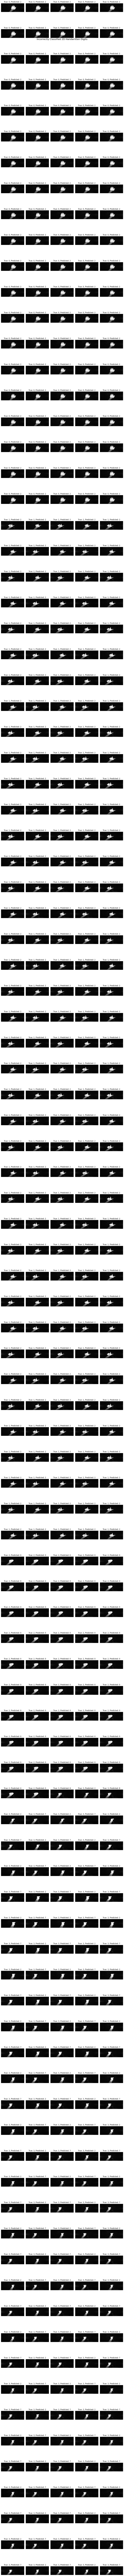

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Load the model and test set
model = network  # Your trained model
test_dir = 'Test/'  # Directory path containing test images

test_set = image_datagen.flow_from_directory(
    test_dir,
    target_size=(640, 240),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

# Make predictions on the test set
predictions = model.predict(test_set)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_set.classes

# Find the indices of incorrectly classified samples
incorrect_indices = np.where(predicted_labels != true_labels)[0]

# Display the incorrectly classified samples
num_images = 500  # Number of images to display
num_rows = int(np.ceil(num_images / 5))  # Number of rows in the subplot grid

fig, axes = plt.subplots(num_rows, 5, figsize=(12, 2.5 * num_rows))
fig.suptitle('Incorrectly Classified 2D Handwritten Digits', fontsize=16)

for i, index in enumerate(incorrect_indices[:num_images]):
    image_path = test_set.filepaths[index]
    image = load_img(image_path)
    row_idx = i // 5
    col_idx = i % 5
    axes[row_idx, col_idx].imshow(image)
    axes[row_idx, col_idx].set_title(f'True: {true_labels[index]}, Predicted: {predicted_labels[index]}')
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

